# Python for Data & Analytics - Lesson 5 
# Complexity, Efficiency, & Algorithms
## Lesson 4 Homework Solution

In [2]:
# 1. Use list comprehension to create the list: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[i**2 for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [1]:
# 2. Use list comprehension to create the list: [1, 4, 9, 25, 36, 49, 81, 100].
[i**2 for i in range(1, 11) if i % 4 != 0]

[1, 4, 9, 25, 36, 49, 81, 100]

In [4]:
# 3. Use list comprehension to create the list:
#    [['two foxes', 'three foxes', 'four foxes'],
#     ['two lions', 'three lions', 'four lions']]    
[[num + animal for num in ['two ', 'three ', 'four ']] for animal in ['foxes', 'lions']]

[['two foxes', 'three foxes', 'four foxes'],
 ['two lions', 'three lions', 'four lions']]

In [5]:
# 4. Write a function that receives a tuple of dictionaries and concatenates them into one.
# Sample Input: ({1:10, 2:20}, {3:30, 4:40}, {5:50, 6:60})
# Sample Output: {1:10, 2:20, 3:30, 4:40, 5:50, 6:60}
def concat_dicts_1(dicts):
    return_dict = {}
    for d in dicts:
        for key in d:
            return_dict[key] = d[key]
    return return_dict

concat_dicts_1(({1:10, 2:20}, {3:30, 4:40}, {5:50, 6:60}))

{1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60}

In [6]:
def concat_dicts_2(dicts):
    return {key:d[key] for d in dicts for key in d}

concat_dicts_2(({1:10, 2:20}, {3:30, 4:40}, {5:50, 6:60}))

{1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60}

In [7]:
# 5. Write a function that receives a dictionary and outputs a sorted list of its values. Tip: use list comprehension.
# Sample Input: {1:10, 2:20, 4:40, 5:50, 6:60, 3:30}
# Sample Output: [10, 20, 30, 40, 50, 60]
def sort_dict_values(d):
    return sorted([d[key] for key in d])

sort_dict_values({1:10, 2:20, 4:40, 5:50, 6:60, 3:30})

[10, 20, 30, 40, 50, 60]

## Complexity in Algorithms

In [1]:
# How many time are we going through the inner loop?
def my_iterative_sort(unsorted_list):
    sorted_list = []
    loops = 0
    # As long as there are unsorted items, find the minimum unsorted value and move it to the sorted list
    while len(unsorted_list) > 0: 
        min_num = float("inf")
        for num in unsorted_list:
            loops += 1
            if num < min_num:
                min_num = num
        sorted_list.append(min_num)
        del unsorted_list[unsorted_list.index(min_num)]
#     print(loops)
    return sorted_list

my_iterative_sort([2, 4, 7, 6, 1, 10, 8, 3, 5, 9, 0, 10])
# n(n+1)/2 -> N^2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10]

In [2]:
13 * 12 / 2

78.0

In [3]:
from time import time

time()

1625059641.5422127

In [11]:
# We can time operations with the time() function
from time import time

my_list = [2, 4, 7, 6, 1, 10, 8, 3, 5, 9, 0] * 100
start = time()
my_iterative_sort(my_list)
end = time()

end - start

0.10974001884460449

In [6]:
my_list = [2, 4, 7, 6, 1, 10, 8, 3, 5, 9, 0] * 100
len(my_list)

1100

In [24]:
# We can also time operations using the %timite magic function and get mean and std of multiple runs.
my_list = [2, 4, 7, 6, 1, 10, 8, 3, 5, 9, 0] * 100

%timeit my_iterative_sort(my_list)

254 ns ± 32.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
# Let's measure the relationship between list length and time in a methodical way
from random import shuffle
import numpy as np

Ns = np.linspace(0, 10000, 21)
times = []

for n in Ns:
    my_list = list(range(int(n)))
    shuffle(my_list)
    start = time()
    my_iterative_sort(my_list)
    end = time()
    times.append(end - start)
    
Ns[:5], times[:5]

(array([   0.,  500., 1000., 1500., 2000.]),
 [0.0,
  0.016509056091308594,
  0.06266546249389648,
  0.10631632804870605,
  0.1804826259613037])

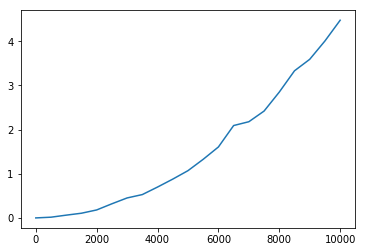

In [31]:
# Let's plot the time aginst the list's length
import matplotlib.pyplot as plt

_ = plt.plot(Ns, times)

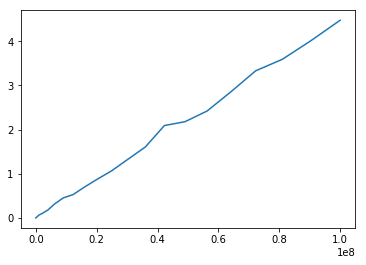

In [32]:
# We can see that running time is proportional to n**2
_ = plt.plot(Ns**2, times)

### Computational Complexity - Key Concepts
* **Computational complexity theory** provides conceptual tools to assess computational problems according to their inherent difficulty.


* An **Algorithm** is a set of instructions, typically to solve a class of problems or perform a computational task. Algorithms are unambiguous specifications for performing calculation, data processing, automated reasoning, and related tasks.


* In complexity theory, **Big O notation** is used to classify the efficiency of algorithms in terms of to how their running time or space requirements grow as the input size grows. In the above example of the my_sort() function, the complexity is $O(N^{2})$, because for large value of $N$, running time increases proportionally to $N^{2}$. 

    * $O(N$) represents algorithms in which running time increases proportionally to $N$.
    * $O(log(N)$) represents algorithms in which running time increases proportionally to $log(N)$.
    * $O(1)$ represents algorithms in which running time does not change when $N$ increases.
    
    
* **Efficiency** - much of computer science is about optimization, or in other words, increasing the efficiency of solutions to computational problems. Efficiency can refer to different types of resources.
    
### Dropping constants in Big O Notation
The following expressions are all equivalent to $O(N^{3})$:  
$O(3N^{3})$    
$O(N(N^{2} + 3))$    
$O(N^{3} -2)$    
$O(N^{3}-N^{2}-N)$    
$O((N^{2}+3)(N+1))$ 

### Find the Big O in time of the following examples: 

In [7]:
n = 10
m = 20

In [5]:
s = 0
for i in range(n):
    s += i
print(s)

49985001


In [4]:
s = 0
for i in range(n):
    s += i
    for j in range(n):
        s += j   
print(s)

499850010000


In [36]:
s = 0
for i in range(100):
    s += i
    for j in range(1000):
        s += j   
print(s)

49954950


In [37]:
s = 0
for i in range(n):
    s += i
    for j in range(m):
        s += j   
print(s)

1945


In [38]:
# What is the Big O of the following code in both time and space (memory use)?
import numpy as np

matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        matrix[i, j] = i + j
matrix

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
       [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
       [ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.],
       [ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.],
       [ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.],
       [ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]])

In [14]:
n = 8

In [15]:
s = 0
i = n
while i >= 1:
    s += i
    i /= 2
print(s)

18.75


The loop above will run the number of times we need to divide $N$ to get below 2. We could approach it in reverse: how many times do we need to multiply 1 by 2 to get above $N$?

$2^{X} = N$  
$log(2^{X}) = log(N)$   
$Xlog(2) = log(N)$   
$X = log(N) / log(2)$

So, this code operates in $O(log(N))$ time. This is a useful thing to remember: if something continuously divides by a constant, it is $O(log(N))$ in time.

## Recursion
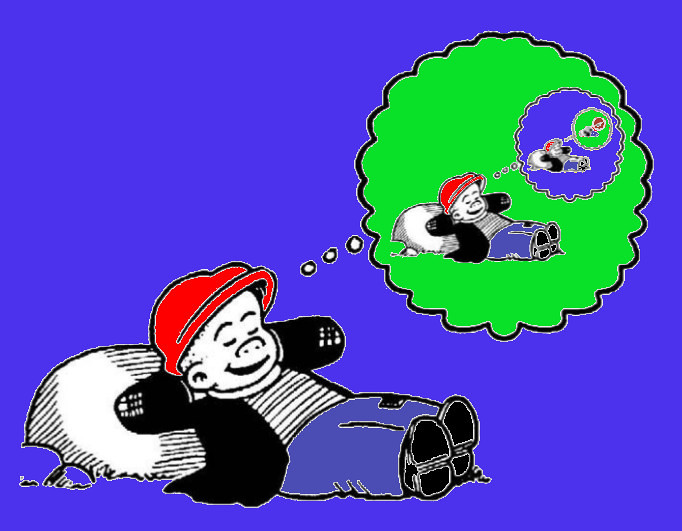
[This image](https://www.flickr.com/photos/byzantiumbooks/30709570943) is from Bill Smith's Flickr account, and originally from artist Ernie Bushmiller and his comic strip *Nancy*, by way of page 144 of Douglas Hofstadter's *I am a Strange Loop*.

In [17]:
# Recursion is a useful way for calculating factorial.
def factorial(n):
    if n == 1:
        return 1
    else:
        return factorial(n - 1) * n

factorial(10)

3628800

In [18]:
# This is the basic structure of a recursive function
def basic_recursion(n):
    if n == 0: # We have to have a BASE CASE to prevents infinite recursion.
        return
    else: 
        print(n) 
        basic_recursion(n - 1) # If the base case doesn't hold, the function calls itself
        
basic_recursion(5)

5
4
3
2
1


In [19]:
def no_base_case_recursion(n):
    print(n) 
    no_base_case_recursion(n-1)

no_base_case_recursion(5)

5
4
3
2
1
0
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-63
-64
-65
-66
-67
-68
-69
-70
-71
-72
-73
-74
-75
-76
-77
-78
-79
-80
-81
-82
-83
-84
-85
-86
-87
-88
-89
-90
-91
-92
-93
-94
-95
-96
-97
-98
-99
-100
-101
-102
-103
-104
-105
-106
-107
-108
-109
-110
-111
-112
-113
-114
-115
-116
-117
-118
-119
-120
-121
-122
-123
-124
-125
-126
-127
-128
-129
-130
-131
-132
-133
-134
-135
-136
-137
-138
-139
-140
-141
-142
-143
-144
-145
-146
-147
-148
-149
-150
-151
-152
-153
-154
-155
-156
-157
-158
-159
-160
-161
-162
-163
-164
-165
-166
-167
-168
-169
-170
-171
-172
-173
-174
-175
-176
-177
-178
-179
-180
-181
-182
-183
-184
-185
-186
-187
-188
-189
-190
-191
-192
-193
-194
-195
-196
-197
-198
-199
-200
-201
-202
-203
-204
-205
-206
-207
-208
-209
-210
-211
-212
-213
-214
-215
-216
-217
-218
-219
-

-1645
-1646
-1647
-1648
-1649
-1650
-1651
-1652
-1653
-1654
-1655
-1656
-1657
-1658
-1659
-1660
-1661
-1662
-1663
-1664
-1665
-1666
-1667
-1668
-1669
-1670
-1671
-1672
-1673
-1674
-1675
-1676
-1677
-1678
-1679
-1680
-1681
-1682
-1683
-1684
-1685
-1686
-1687
-1688
-1689
-1690
-1691
-1692
-1693
-1694
-1695
-1696
-1697
-1698
-1699
-1700
-1701
-1702
-1703
-1704
-1705
-1706
-1707
-1708
-1709
-1710
-1711
-1712
-1713
-1714
-1715
-1716
-1717
-1718
-1719
-1720
-1721
-1722
-1723
-1724
-1725
-1726
-1727
-1728
-1729
-1730
-1731
-1732
-1733
-1734
-1735
-1736
-1737
-1738
-1739
-1740
-1741
-1742
-1743
-1744
-1745
-1746
-1747
-1748
-1749
-1750
-1751
-1752
-1753
-1754
-1755
-1756
-1757
-1758
-1759
-1760
-1761
-1762
-1763
-1764
-1765
-1766
-1767
-1768
-1769
-1770
-1771
-1772
-1773
-1774
-1775
-1776
-1777
-1778
-1779
-1780
-1781
-1782
-1783
-1784
-1785
-1786
-1787
-1788
-1789
-1790
-1791
-1792
-1793
-1794
-1795
-1796
-1797
-1798
-1799
-1800
-1801
-1802
-1803
-1804
-1805
-1806
-1807
-1808
-1809
-1810
-181

RecursionError: maximum recursion depth exceeded while calling a Python object

Recursion can take a lot of memory. Each function that we call recursively has it own memory allocated. The factorial function above is $O(N)$ in time and $O(N)$ in space (memory). 

In [20]:
# This function uses recursion to convert a string that represents an int to an actual int.

# Dictionaries are useful for representing conversion rules, or more generally, rules about relationships.
char2digit = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9}

def str_to_num(str_num):
    if len(str_num) == 1:
        return char2digit[str_num] # Base case
    else:
        return char2digit[str_num[-1]] + 10 * str_to_num(str_num[:-1])
    
str_to_num('38790')   

38790

## Recursion and Algorithms
Converting an algorithm from an iterative approach (where we perform an operation once for each data item) to a recursive approach (where we continuously divide our data in half) often helps reduce complexity from $O(N)$ to $O(log(N))$.

For example, we will implement here the [Merge Sort algorithm, adapted from Amir Ziai](https://medium.com/@amirziai/merge-sort-walkthrough-with-code-in-python-e4f76d90a4ea).Merge sort uses recursion and is $O(N*log(N))$ in time. It continuously divides the list in half, sorts each half and then merges the sorted lists.

In [47]:
def split(input_list):
    # Splits a list into two. 

    input_list_len = len(input_list)
    midpoint = input_list_len // 2
    return input_list[:midpoint], input_list[midpoint:]

split([2, 4, 7, 6, 1, 10, 8, 3, 5, 9, 0])

([2, 4, 7, 6, 1], [10, 8, 3, 5, 9, 0])

In [48]:
def merge_sorted_lists(list_left, list_right):
    # Merge two sorted lists. This is a linear operation O(len(list_right) + len(list_right))

    # Base case: one or both of the lists are empty
    if len(list_left) == 0:
        return list_right
    elif len(list_right) == 0:
        return list_left
    
    # General case
    index_left = index_right = 0
    list_merged = []  # list to build and return
    list_len_target = len(list_left) + len(list_right)

    while len(list_merged) < list_len_target:
        if list_left[index_left] <= list_right[index_right]:
            # Value on the left list is smaller (or equal so it should be selected)
            list_merged.append(list_left[index_left])
            index_left += 1
        else:
            # Right value bigger
            list_merged.append(list_right[index_right])
            index_right += 1
            
        # If we are at the end of one of the lists we can take a shortcut
        if index_right == len(list_right):
            # Reached the end of right
            # Append the remainder of left and break
            list_merged += list_left[index_left:]
            break
        elif index_left == len(list_left):
            # Reached the end of left
            # Append the remainder of right and break
            list_merged += list_right[index_right:]
            break
        
    return list_merged

merge_sorted_lists([1, 2, 4, 6, 7], [0, 3, 5, 8, 9, 10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [49]:
def merge_sort(input_list):
    # Putting it all together
    
    if len(input_list) <= 1:
        return input_list
    else:
        left, right = split(input_list)
        # The following line is the recursion - the most important part
        return merge_sorted_lists(merge_sort(left), merge_sort(right))

merge_sort([2, 4, 7, 6, 1, 10, 8, 3, 5, 9, 0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [50]:
Ns = np.linspace(0, 20000, 11)
times_iter = []
times_merge = []
times_bi = []

for n in Ns:
    input_list = list(range(int(n)))
    shuffle(my_list)
    
    start = time()
    my_iterative_sort(input_list)
    end = time()
    times_iter.append(end - start)
    
    start = time()
    merge_sort(input_list)
    end = time()
    times_merge.append(end - start)
    
    start = time()
    sorted(input_list)
    end = time()
    times_bi.append(end - start)
    

Ns[-5:], times_iter[-5:], times_merge[-5:], times_bi[-5:]

(array([12000., 14000., 16000., 18000., 20000.]),
 [7.223404884338379,
  8.087579250335693,
  10.295126914978027,
  13.242146015167236,
  17.009734392166138],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0])

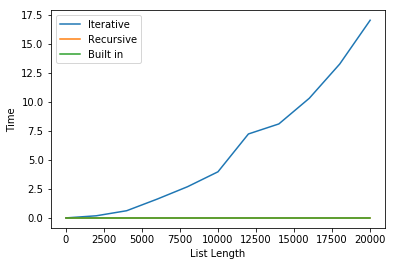

In [51]:
_ = plt.plot(Ns, times_iter, 
             Ns, times_merge, 
             Ns, times_bi)
plt.ylabel('Time')
plt.xlabel('List Length')
plt.legend(('Iterative', 'Recursive', 'Built in'))

In [52]:
Ns = np.linspace(0, 200000, 11)
times_merge = []
times_bi = []

for n in Ns:
    input_list = list(range(int(n)))
    shuffle(my_list)
    
    start = time()
    merge_sort(input_list)
    end = time()
    times_merge.append(end - start)
    
    start = time()
    sorted(input_list)
    end = time()
    times_bi.append(end - start)
    

Ns[-5:], times_merge[-5:], times_bi[-5:]

(array([120000., 140000., 160000., 180000., 200000.]),
 [0.7599461078643799,
  0.8791937828063965,
  1.0235040187835693,
  1.185730218887329,
  1.4423460960388184],
 [0.002004861831665039,
  0.005014181137084961,
  0.0035064220428466797,
  0.003970146179199219,
  0.007018327713012695])

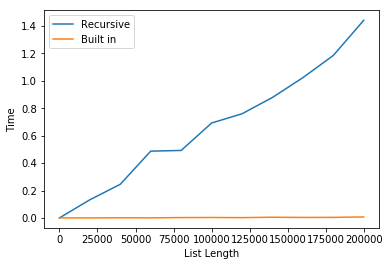

In [53]:
_ = plt.plot(Ns, times_merge, 
             Ns, times_bi)
plt.ylabel('Time')
plt.xlabel('List Length')
plt.legend(('Recursive', 'Built in'))

## Homework
1. In the function my_iterative_sort(), time separately operations that are performed inside and outside the inner loop. Plot your results for lists of lengths given by np.linspace(0, 10000, 21).

2. Write a recursive function that receives an integer N and returns the Nth number in the Fibonacci Sequence. The Fibonacci Sequence is the series of numbers: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, ...
Each next number is found by adding up the two numbers before it.


You can challenge yourself with more algorithms on [Hackerrank](https://www.hackerrank.com/domains/algorithms).